In [1]:
import pandas as pd
dataset = pd.read_csv(r'/content/matches.csv')

#### Check the dataset features and perform preprocessing

In [2]:
dataset.shape

(670, 18)

In [4]:
dataset.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
dataset.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [5]:
import numpy as np
dataset.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)
dataset.fillna(np.NaN)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,04-05-2017,SRH,RCB,RCB,field,normal,0,SRH,35.0,0.0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,04-06-2017,MI,RPS,RPS,field,normal,0,RPS,0.0,7.0,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,04-07-2017,GL,KKR,KKR,field,normal,0,KKR,0.0,10.0,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,04-08-2017,RPS,KXIP,KXIP,field,normal,0,KXIP,0.0,6.0,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,04-08-2017,RCB,DD,RCB,bat,normal,0,RCB,15.0,0.0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,666,2018,Pune,30-Apr,CSK,DD,DD,field,normal,0,CSK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,667,2018,Bangalore,01-May,RCB,MI,MI,field,normal,0,RCB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667,668,2018,Delhi,02-May,DD,RR,RR,field,normal,0,DD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,669,2018,Kolkata,03-May,KKR,CSK,KKR,field,normal,0,KKR,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset.duplicated().value_counts()

,count
False,670


### 1. *Number of Matches played each season*

In [7]:
sub_data1 = dataset.iloc[:, 1]
season = sub_data1.value_counts().keys().tolist()
values = sub_data1.value_counts().tolist()
print(season, values)

[2013, 2012, 2011, 2010, 2014, 2016, 2017, 2015, 2008, 2009, 2018] [76, 74, 73, 60, 60, 60, 59, 59, 58, 57, 34]


#### Importing matplotlib to visualize the results

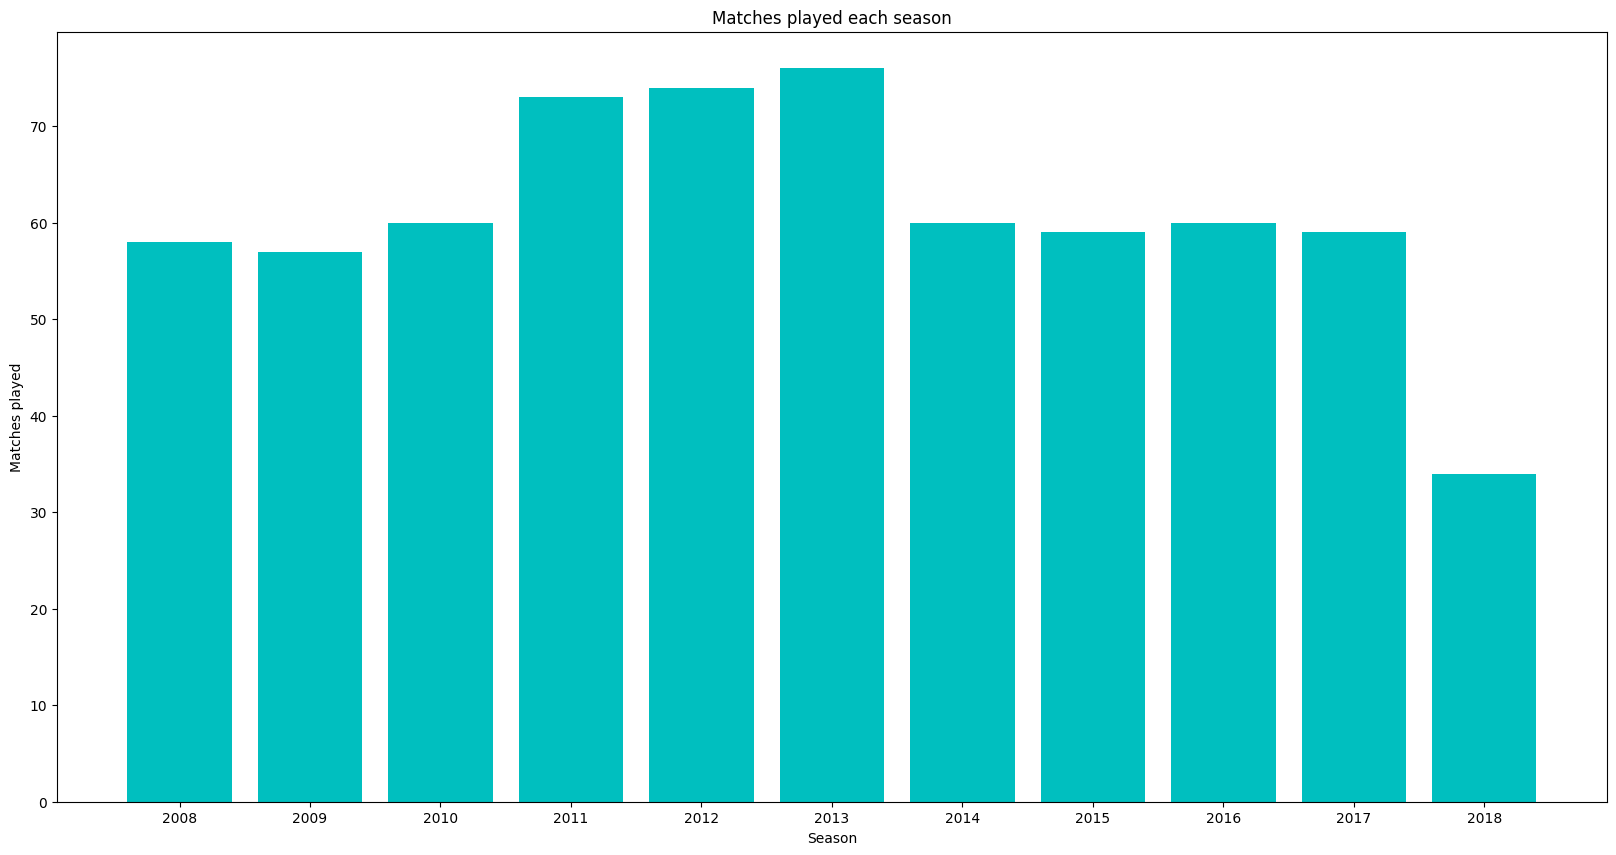

In [8]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(20,10)
plt.xlabel('Season')
plt.ylabel('Matches played')
plt.title('Matches played each season')
plt.bar(season, values, color = 'c')
plt.xticks(season)
plt.show()

#### After the intial success of the IPL, they hosted more matches but the they lost money and TRP as people ended up watching selected matches. In the last few years they've stuck to around 60 matches a season, that's one match a day.

### 2. *Most Man of the Match Awards*

In [9]:
sub_data2 = dataset.iloc[:, 13]
players = sub_data2.value_counts().head(10).keys().tolist()
values = sub_data2.value_counts().head(10).tolist()
print(players, values)

['CH Gayle', 'YK Pathan', 'DA Warner', 'AB de Villiers', 'RG Sharma', 'SK Raina', 'MS Dhoni', 'G Gambhir', 'AM Rahane', 'MEK Hussey'] [18, 16, 15, 15, 14, 14, 13, 13, 12, 12]


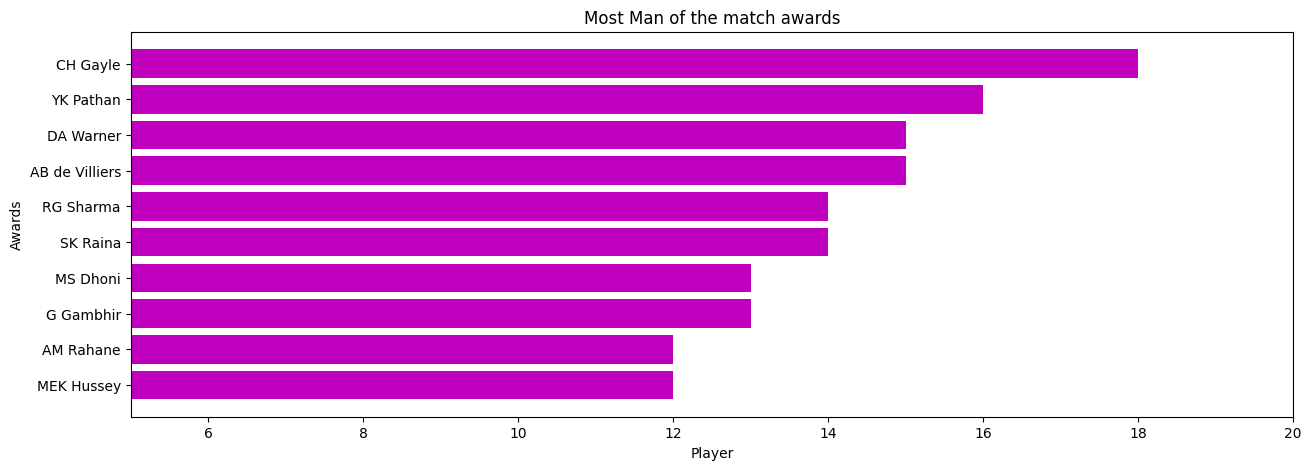

In [10]:
plt.gcf().set_size_inches(15,5)
plt.xlabel('Player')
plt.ylabel('Awards')
plt.title('Most Man of the match awards')
plt.barh(players, values, color = 'm', )
plt.gca().invert_yaxis()
plt.xlim(5, 20)
plt.show()

#### Man of the Match Awards in a way help us identify match winning and impactful players over the seasons. They might not feature in the number game and top stat charts, but on a given day, they could help you win a match single-handedly.

### 3. *Likelihood of Toss determining win*

In [11]:
sub_data3 = dataset.loc[:, ['toss_winner', 'winner']] #use loc instead of iloc as we use column labels
is_true = sub_data3['toss_winner'] == sub_data3['winner']
sub_data3 = sub_data3[is_true]
percentage = (sub_data3.shape[0]/dataset.shape[0]) * 100

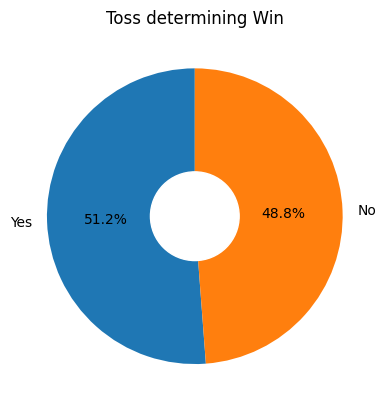

In [12]:
labels = ['Yes', 'No']
share = [percentage, 100 - percentage]
plt.pie(share, labels=labels,autopct='%1.1f%%', startangle=90)
plt.title('Toss determining Win')
my_circle=plt.Circle( (0,0), 0.3, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### Over the last few seasons, many think that toss is a crucial factor in an IPL game, but our chart thinks otherwise. It's okay if you've lost the toss, you still have an almost equal chance of winning the match. That's good news!

### 4. *Favourite Venues of the League*

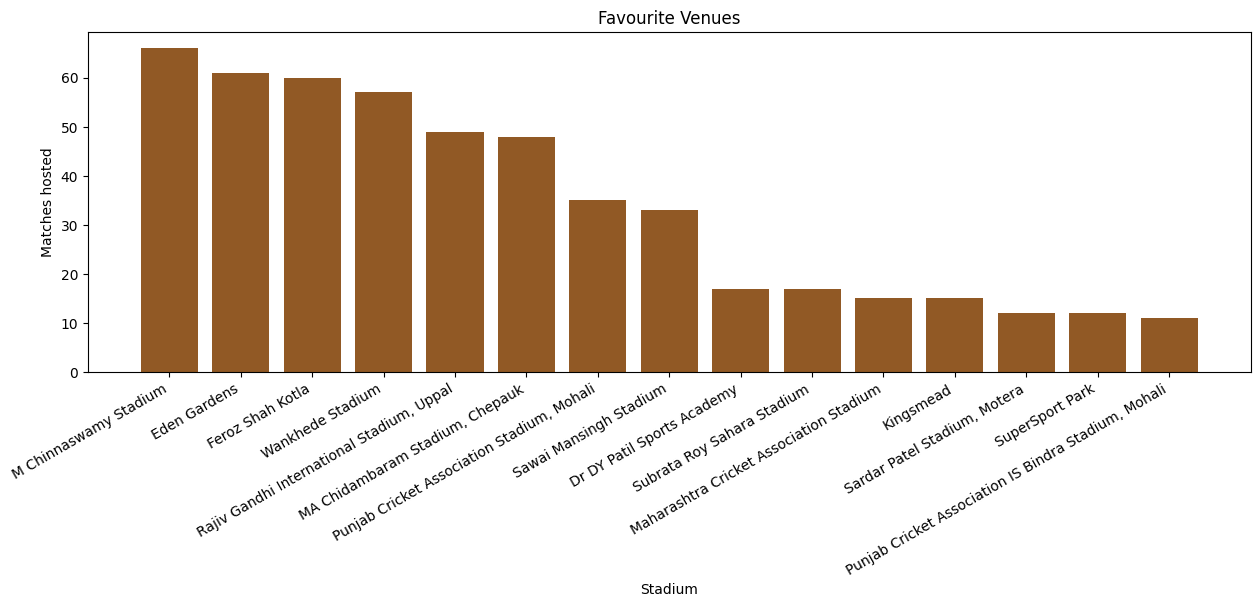

In [13]:
sub_data4 = dataset.loc[:, ['venue']]
stadium = sub_data4['venue'].value_counts().head(15).keys().tolist()
values = sub_data4['venue'].value_counts().head(15).tolist()
plt.gcf().set_size_inches(15,5)
plt.xlabel('Stadium')
plt.ylabel('Matches hosted')
plt.title('Favourite Venues')
plt.bar(stadium, values, color = '#915925')
plt.gcf().autofmt_xdate()
plt.show()

#### This bar chart shows us the venues that have been constant over the years and have also generated great revenue for their franchise due to fan popularity. These are good locations to have your franchise setup in.

### 5. *Toss decisions over the seasons*

In [14]:
sub_data5 = dataset.loc[:, ['season', 'toss_decision']]
sub_data5['season']= sub_data5['season'].astype(str)
sub_data5_onehot = sub_data5.copy()
sub_data5_onehot = pd.get_dummies(sub_data5_onehot, columns=['toss_decision'], prefix = ['toss_decision']) #one hot encoding
sub_data5_onehot = sub_data5_onehot.groupby('season', as_index = False).sum()
season = sub_data5_onehot['season'].tolist()
bat = sub_data5_onehot['toss_decision_bat'].tolist()
bowl = sub_data5_onehot['toss_decision_field'].tolist()
print(season,bat,bowl)

['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'] [26, 35, 39, 25, 37, 45, 19, 25, 11, 11, 3] [32, 22, 21, 48, 37, 31, 41, 34, 49, 48, 31]


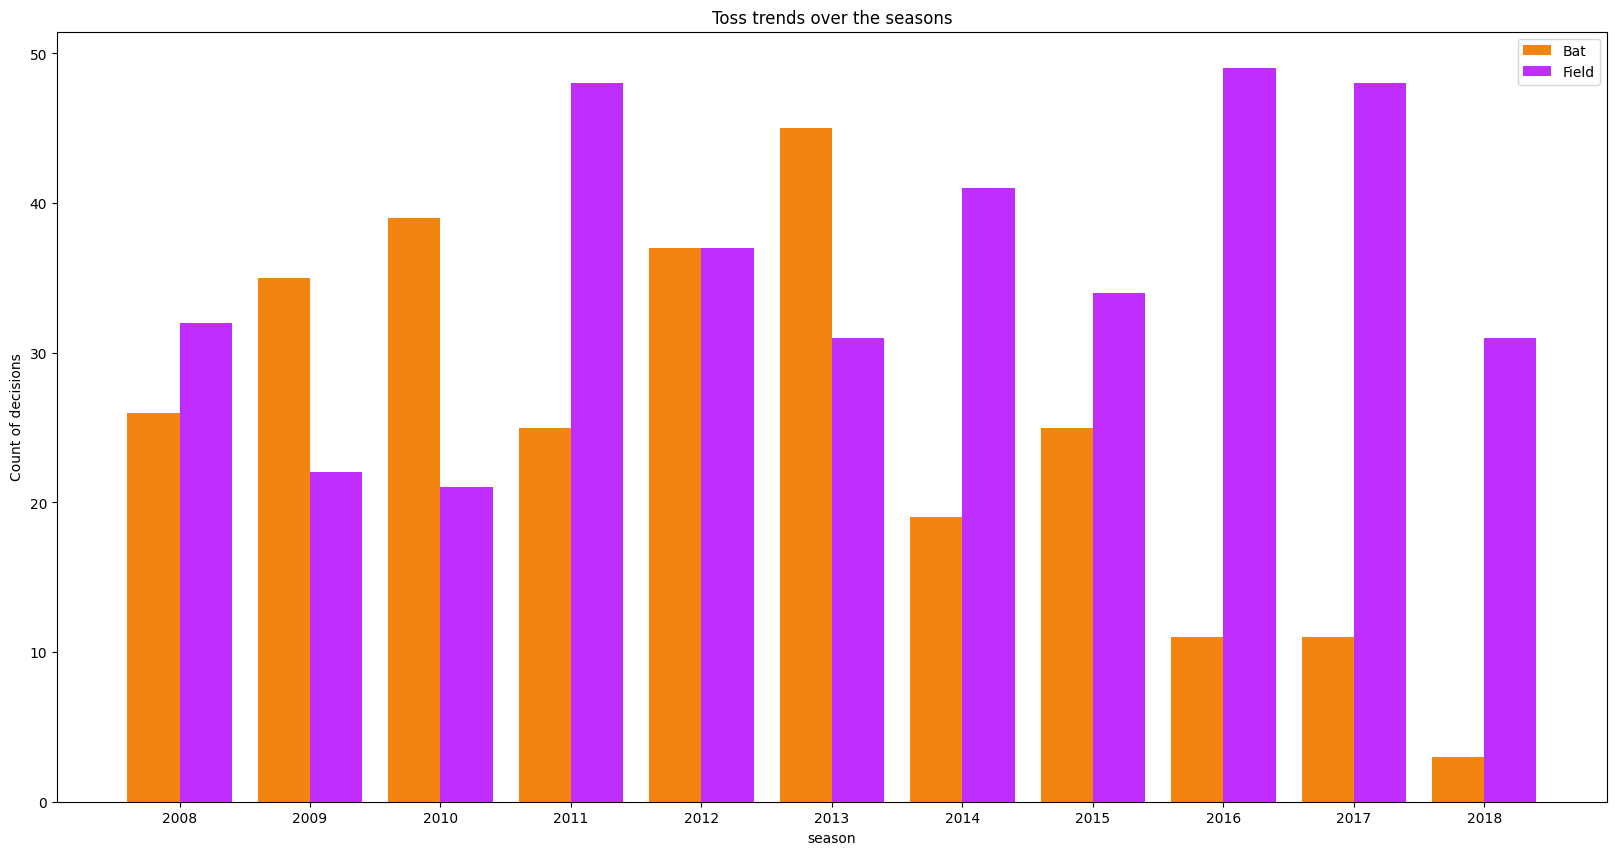

In [15]:
plt.gcf().set_size_inches(20,10)
plt.xlabel('season')
plt.ylabel('Count of decisions')
plt.title('Toss trends over the seasons')
def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    plt.bar(_X - width/2, vals[0], width=width/n, color = '#F2840F', align = 'edge') #align helps xlabels align to the edge
    plt.bar(_X, vals[1], width=width/n, color = '#C02EFF', align = 'edge')
    plt.xticks(_X, X)

subcategorybar(season, [bat, bowl])
label = ['Bat', 'Field']
plt.legend(labels = label)
plt.show()

### 6. *Most experienced Umpires*

In [16]:
sub_data6 = dataset.loc[:, ['umpire1', 'umpire2']]
umpire1 = sub_data6['umpire1'].tolist()
umpire2 = sub_data6['umpire2'].tolist()
umpires = umpire1 + umpire2
from collections import Counter
c = Counter(umpires)
umpires = []
count = []
for i,j in c.most_common(10):
    umpires.append(i)
    count.append(j)
print(umpires, count)

['HDPK Dharmasena', 'S Ravi', nan, 'AK Chaudhary', 'C Shamshuddin', 'SJA Taufel', 'M Erasmus', 'Asad Rauf', 'BR Doctrove', 'CK Nandan'] [87, 85, 70, 58, 56, 55, 54, 51, 42, 41]


### 7. *Matches won by each team*

In [23]:
sub_data7 = dataset.loc[:, ['team1', 'team2', 'winner']]
team1 = sub_data7['team1'].tolist()
team2 = sub_data7['team2'].tolist()
teams = team1 + team2
c = Counter(teams)
teams = []
matches = []
for i,j in c.most_common():
    teams.append(i)
    matches.append(j)
wins = sub_data7['winner'].value_counts().tolist()
print(teams, matches, wins)
loss = [int(n1) - int(n2) for n1,n2 in zip(matches, wins)]
print(loss)

['MI', 'RCB', 'KKR', 'DD', 'KXIP', 'CSK', 'RR', 'SRH', 'DC', 'PW', 'GL', 'RPS', 'KTK'] [166, 160, 157, 156, 156, 140, 126, 84, 75, 46, 30, 30, 14] [95, 85, 82, 76, 75, 67, 65, 47, 29, 15, 13, 12, 6, 3]
[71, 75, 75, 80, 81, 73, 61, 37, 46, 31, 17, 18, 8]


### 8. *Analyzing two teams battle over the seasons (MI Vs CSK)*

In [24]:
sub_data8 = dataset.loc[:, ['season', 'winner']]
sub_data5['season']= sub_data5['season'].astype(str)
sub_data8 = sub_data8[(sub_data7['winner'] == 'MI') | (sub_data7['winner'] == 'CSK')]
sub_data8 = pd.get_dummies(sub_data8, columns = ['winner'])
sub_data8 = sub_data8.groupby('season', as_index = False).sum()
season = sub_data8['season'].tolist()
csk = sub_data8['winner_CSK'].tolist()
mi = sub_data8['winner_MI'].tolist()
n = len(season)
season = season[:n-2] #delete last 2 values as csk was disqualified
csk = csk[:n-2]
mi = mi[:n-2]
print(season, mi, csk)

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016] [7, 5, 11, 10, 10, 13, 7, 10, 7] [9, 8, 9, 11, 10, 12, 10, 10, 0]


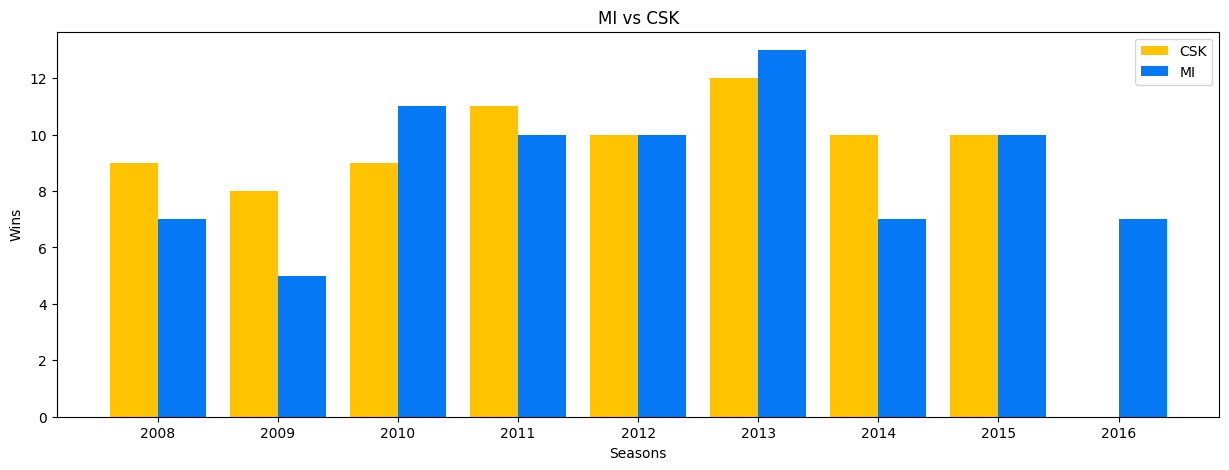

In [25]:
plt.gcf().set_size_inches(15,5)
plt.xlabel('Seasons')
plt.ylabel('Wins')
plt.title('MI vs CSK')
def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    plt.bar(_X - width/2, vals[0], width=width/n, color = '#FFC300', align = 'edge') #align helps xlabels align to the edge
    plt.bar(_X, vals[1], width=width/n, color = '#0579F5', align = 'edge')
    plt.xticks(_X, X)

subcategorybar(season, [csk, mi])
label = ['CSK', 'MI']
plt.legend(labels = label)
plt.show()

#### MI vs CSK is like a GSW vs Lebron Team match. The matches are always close and these are the two best teams in the league. This chart shows how these teams have battled over the years.

### 9. *Average innings score across seasons*

In [27]:
delivery = pd.read_csv(r'/content/deliveries.csv')
data = dataset[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

In [28]:
sub_data9 = data.loc[:, ['season', 'inning', 'total_runs']]
sub_data9['inning'] = sub_data9['inning'].replace(3,1)
sub_data9['inning'] = sub_data9['inning'].replace(4,2)
runs_data= sub_data9.groupby(['season', 'inning'], as_index = False)['total_runs'].sum()
runs_data

,season,inning,total_runs
0,2008,1.0,9336.0
1,2008,2.0,8601.0
2,2009,1.0,8580.0
3,2009,2.0,7773.0
4,2010,1.0,9896.0
5,2010,2.0,8987.0
6,2011,1.0,11123.0
7,2011,2.0,10031.0
8,2012,1.0,11658.0
9,2012,2.0,10795.0


In [29]:
sub_data9n = data.loc[:, ['season', 'match_id']]
df = sub_data9n.groupby('season')['match_id'].nunique()
matches = df.tolist()
matches = [val for val in matches for _ in (0, 1)]
matches

[58,
 58,
 57,
 57,
 60,
 60,
 73,
 73,
 74,
 74,
 76,
 76,
 60,
 60,
 59,
 59,
 60,
 60,
 59,
 59,
 0,
 0]

In [30]:
t_runs = runs_data['total_runs']
avg_runs = [round(int(y)/int(x),2) for x,y in zip(matches, t_runs)]
avg_runs1 = avg_runs[0::2]
avg_runs2 = avg_runs[1::2]
print(avg_runs1,avg_runs2)

[160.97, 150.53, 164.93, 152.37, 157.54, 156.36, 163.25, 166.51, 162.6, 165.97] [148.29, 136.37, 149.78, 137.41, 145.88, 141.04, 152.27, 144.56, 151.77, 152.44]


#### This grouped graph shows the average first and second innings score across the seasons. The larger the gap, the more it favors towards a good batting pitch.

### 10. *Runs scored across seasons*

In [32]:
runs_data= sub_data9.groupby(['season'], as_index = False)['total_runs'].sum()
runs = runs_data['total_runs'].tolist()

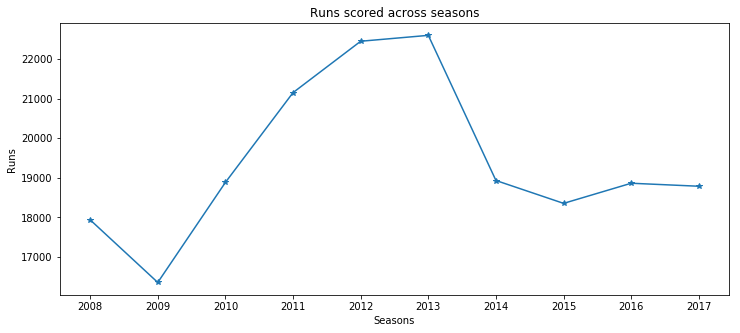

In [ ]:
plt.gcf().set_size_inches(12, 5)
plt.xlabel('Seasons')
plt.ylabel('Runs')
plt.title('Runs scored across seasons')
plt.plot(season, runs, marker='*')
plt.xticks(season)
plt.show()

#### This line chart shows us that during the middle period, IPL grounds heavily favored batsman. Over the last few years, the bowlers have adapted and restricted the batsman. The franchise should pay attention on acquiring good quality bowlers which was neglected earlier. A reason why SRH and MI won during those years.

### 11. *Top runs scorers*

In [34]:
sub_data11 = delivery.loc[:, ['batsman', 'batsman_runs']]
sub_data = sub_data11.groupby('batsman', as_index = False).sum()
sub_data = sub_data.sort_values(by=['batsman_runs'], ascending = False)
sub_data = sub_data.head(5)
players = sub_data['batsman'].tolist()
values = sub_data['batsman_runs'].tolist()
print(players, values)

['SK Raina', 'V Kohli', 'RG Sharma', 'G Gambhir', 'DA Warner'] [4548, 4423, 4207, 4132, 4014]


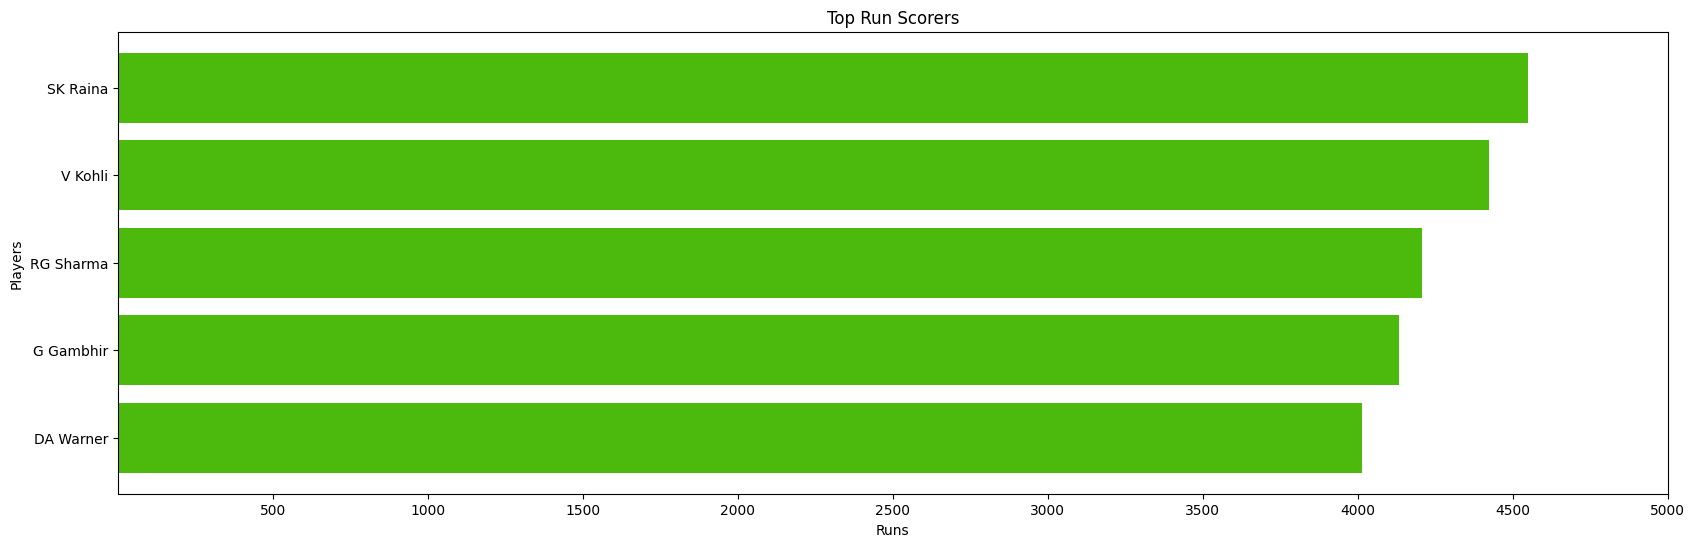

In [35]:
plt.gcf().set_size_inches(20,6)
plt.title('Top Run Scorers')
plt.xlabel('Runs')
plt.ylabel('Players')
plt.barh(players, values, color = '#4CBA0D')
plt.gca().invert_yaxis()
plt.xticks([500,1000,1500,2000,2500,3000,3500,4000,4500,5000])
plt.show()

#### Displaying the highest run scorers in the IPL

### 12. *Strike Rate of top batsman*

In [36]:
data = delivery.loc[:, ['batsman', 'batsman_runs']]
runs = sub_data['batsman_runs'].tolist()
balls = []
is_1 = data['batsman'] == 'SK Raina'
data1 = data[is_1]
balls1 = data1.shape[0]
balls.append(balls1)
is_2 = data['batsman'] == 'V Kohli'
data2 = data[is_2]
balls2 = data2.shape[0]
balls.append(balls2)
is_3 = data['batsman'] == 'RG Sharma'
data3 = data[is_3]
balls3 = data3.shape[0]
balls.append(balls3)
is_4 = data['batsman'] == 'G Gambhir'
data4 = data[is_4]
balls4 = data4.shape[0]
balls.append(balls4)
is_5 = data['batsman'] == 'DA Warner'
data5 = data[is_5]
balls5 = data5.shape[0]
balls.append(balls1)

### 13. *Distribution of runs by Top batsman*

#### 13.1 SK Raina

In [38]:
sub_data13 = delivery.loc[:, ['batsman', 'batsman_runs']]
is_raina = sub_data13['batsman'] == 'SK Raina'
raina_data = sub_data13[is_raina]
raina_all = raina_data.shape[0]
is_0 = raina_data['batsman_runs'] == 0
is_1 = raina_data['batsman_runs'] == 1
is_2 = raina_data['batsman_runs'] == 2
is_3 = raina_data['batsman_runs'] == 3
is_4 = (raina_data['batsman_runs'] == 4) | (raina_data['batsman_runs'] == 5)
is_6 = raina_data['batsman_runs'] == 6
raina_0 = raina_data[is_0]
raina_0 = raina_0.shape[0]
raina_1 = raina_data[is_1]
raina_1 = raina_1.shape[0]
raina_2 = raina_data[is_2]
raina_2 = raina_2.shape[0]
raina_3 = raina_data[is_3]
raina_3 = raina_3.shape[0]
raina_4 = raina_data[is_4]
raina_4 = raina_4.shape[0]
raina_6 = raina_data[is_6]
raina_6 = raina_6.shape[0]

In [39]:
labels1 = '0s', '1s', '2s', '3s', '4s', '6s'
sizes1 = [raina_0, raina_1, raina_2, raina_3, raina_4, raina_6]
explode = (0, 0, 0, 0, 0, 0.1)

#### 13.2 V Kohli

In [40]:
is_kohli = sub_data13['batsman'] == 'V Kohli'
kohli_data = sub_data13[is_kohli]
kohli_all = kohli_data.shape[0]
is_0 = kohli_data['batsman_runs'] == 0
is_1 = kohli_data['batsman_runs'] == 1
is_2 = kohli_data['batsman_runs'] == 2
is_3 = kohli_data['batsman_runs'] == 3
is_4 = (kohli_data['batsman_runs'] == 4) | (kohli_data['batsman_runs'] == 5)
is_6 = kohli_data['batsman_runs'] == 6
kohli_0 = kohli_data[is_0]
kohli_0 = kohli_0.shape[0]
kohli_1 = kohli_data[is_1]
kohli_1 = kohli_1.shape[0]
kohli_2 = kohli_data[is_2]
kohli_2 = kohli_2.shape[0]
kohli_3 = kohli_data[is_3]
kohli_3 = kohli_3.shape[0]
kohli_4 = kohli_data[is_4]
kohli_4 = kohli_4.shape[0]
kohli_6 = kohli_data[is_6]
kohli_6 = kohli_6.shape[0]

In [41]:
labels2 = '0s', '1s', '2s', '3s', '4s', '6s'
sizes2 = [kohli_0, kohli_1, kohli_2, kohli_3, kohli_4, kohli_6]
explode = (0, 0, 0, 0, 0, 0.1)

#### 13.3 RG Sharma

In [42]:
is_sharma = sub_data13['batsman'] == 'RG Sharma'
sharma_data = sub_data13[is_sharma]
sharma_all = sharma_data.shape[0]
is_0 = sharma_data['batsman_runs'] == 0
is_1 = sharma_data['batsman_runs'] == 1
is_2 = sharma_data['batsman_runs'] == 2
is_3 = sharma_data['batsman_runs'] == 3
is_4 = (sharma_data['batsman_runs'] == 4) | (sharma_data['batsman_runs'] == 5)
is_6 = sharma_data['batsman_runs'] == 6
sharma_0 = sharma_data[is_0]
sharma_0 = sharma_0.shape[0]
sharma_1 = sharma_data[is_1]
sharma_1 = sharma_1.shape[0]
sharma_2 = sharma_data[is_2]
sharma_2 = sharma_2.shape[0]
sharma_3 = sharma_data[is_3]
sharma_3 = sharma_3.shape[0]
sharma_4 = sharma_data[is_4]
sharma_4 = sharma_4.shape[0]
sharma_6 = sharma_data[is_6]
sharma_6 = sharma_6.shape[0];

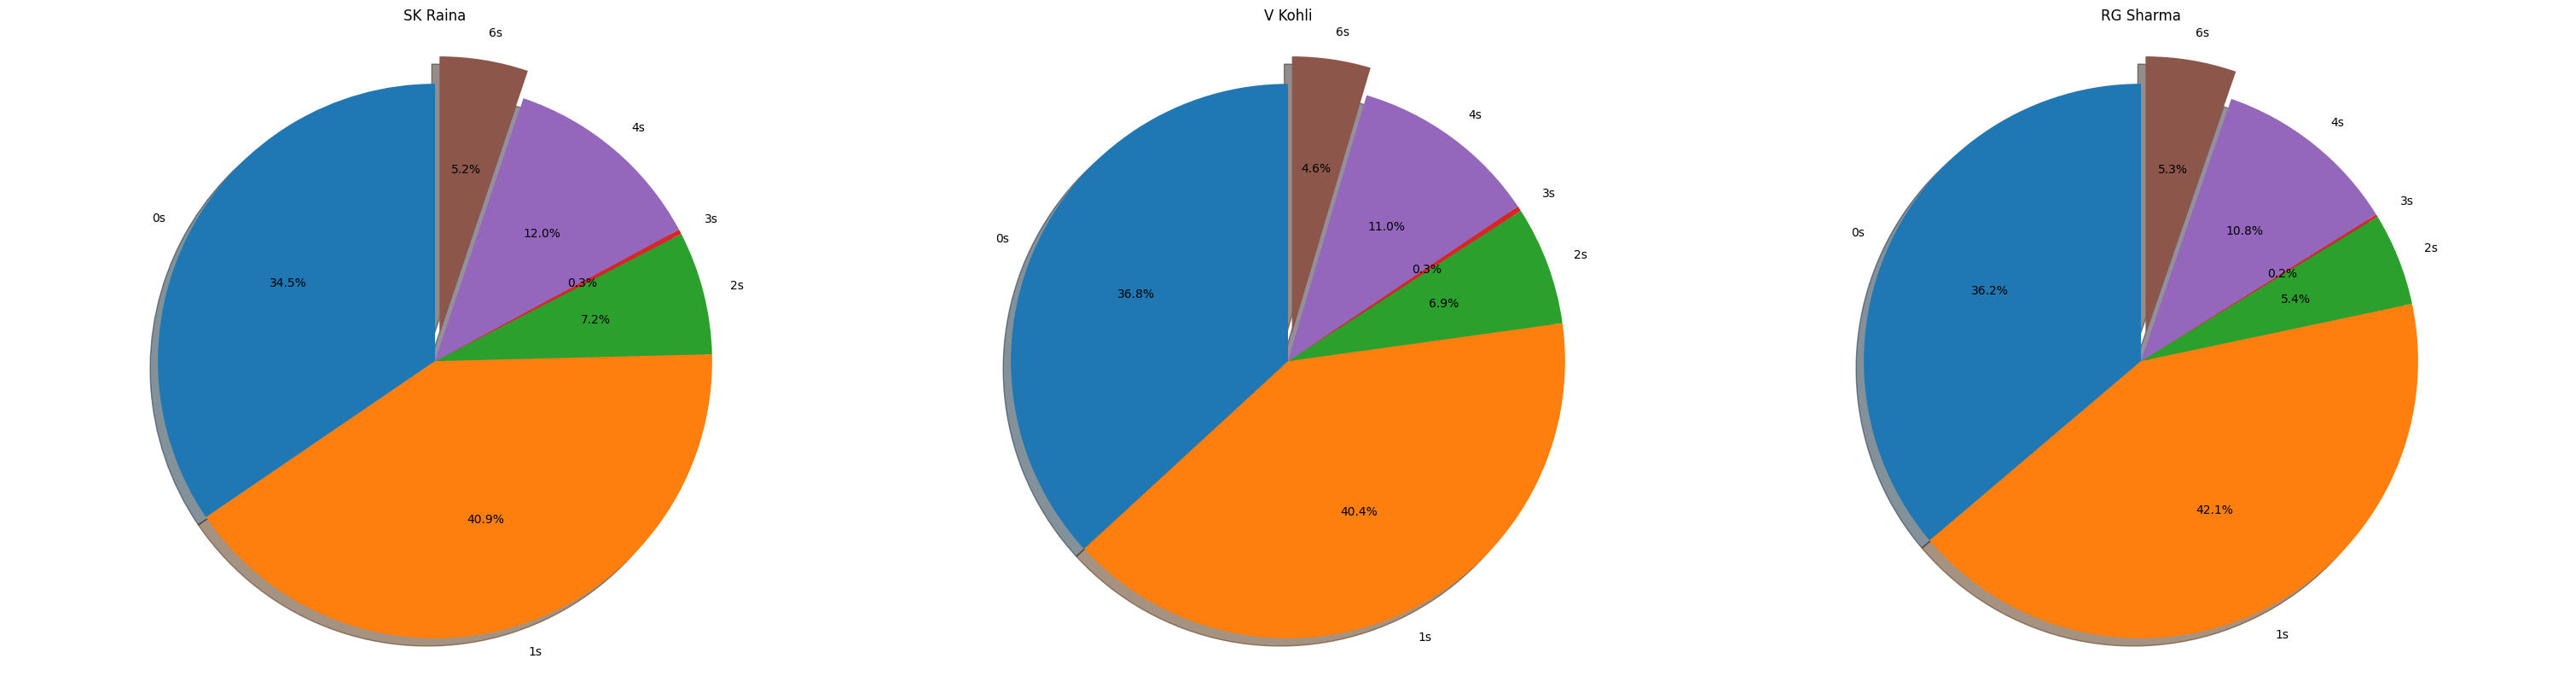

('0s', '1s', '2s', '3s', '4s', '6s') [1163, 1377, 242, 10, 403, 174]
('0s', '1s', '2s', '3s', '4s', '6s') [1287, 1410, 242, 11, 384, 160]
('0s', '1s', '2s', '3s', '4s', '6s') [1185, 1379, 177, 5, 355, 173]


In [43]:
labels3 = '0s', '1s', '2s', '3s', '4s', '6s'
sizes3 = [sharma_0, sharma_1, sharma_2, sharma_3, sharma_4, sharma_6]
explode = (0, 0, 0, 0, 0, 0.1)

fig = plt.figure()
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(sizes1, explode=explode, labels=labels1, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('SK Raina')

ax2 = fig.add_axes([.5, 0, .5, .5], aspect=1)
ax2.pie(sizes2, explode=explode, labels=labels2, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('V Kohli')

ax3 = fig.add_axes([1, 0, .5, .5], aspect=1)
ax3.pie(sizes3, explode=explode, labels=labels3, autopct='%1.1f%%', shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title('RG Sharma')
plt.gcf().set_size_inches(20,15)
plt.show()
print(labels1, sizes1)
print(labels2, sizes2)
print(labels3, sizes3)

#### This Pie Chart shows us a very interesting insight. Contrary to popular belief, the top batsman get the most chunk of their runs through 1s and 6s is actually a really small portion of their run game.

### 14. *Highest wicket takers in the league*

In [44]:
sub_data14 = delivery.loc[:, ['batsman', 'bowler', 'dismissal_kind']]
dismissal_kinds = ['caught',
 'bowled',
 'run out',
 'lbw',
 'caught and bowled',
 'stumped',
 'hit wicket']
is_bowler = (sub_data14['dismissal_kind'] == 'bowled') | (sub_data14['dismissal_kind'] == 'caught') | (sub_data14['dismissal_kind'] == 'caught and bowled') | (sub_data14['dismissal_kind'] == 'stumped') | (sub_data14['dismissal_kind'] == 'lbw') | (sub_data14['dismissal_kind'] == 'hit wicket')
bowler_data = sub_data14[is_bowler].loc[:, ['bowler']]
bowler = bowler_data['bowler'].value_counts().head(5).keys().tolist()
wickets = bowler_data['bowler'].value_counts().head(5).tolist()
print(bowler, wickets)

['SL Malinga', 'A Mishra', 'Harbhajan Singh', 'PP Chawla', 'DJ Bravo'] [154, 134, 127, 126, 122]


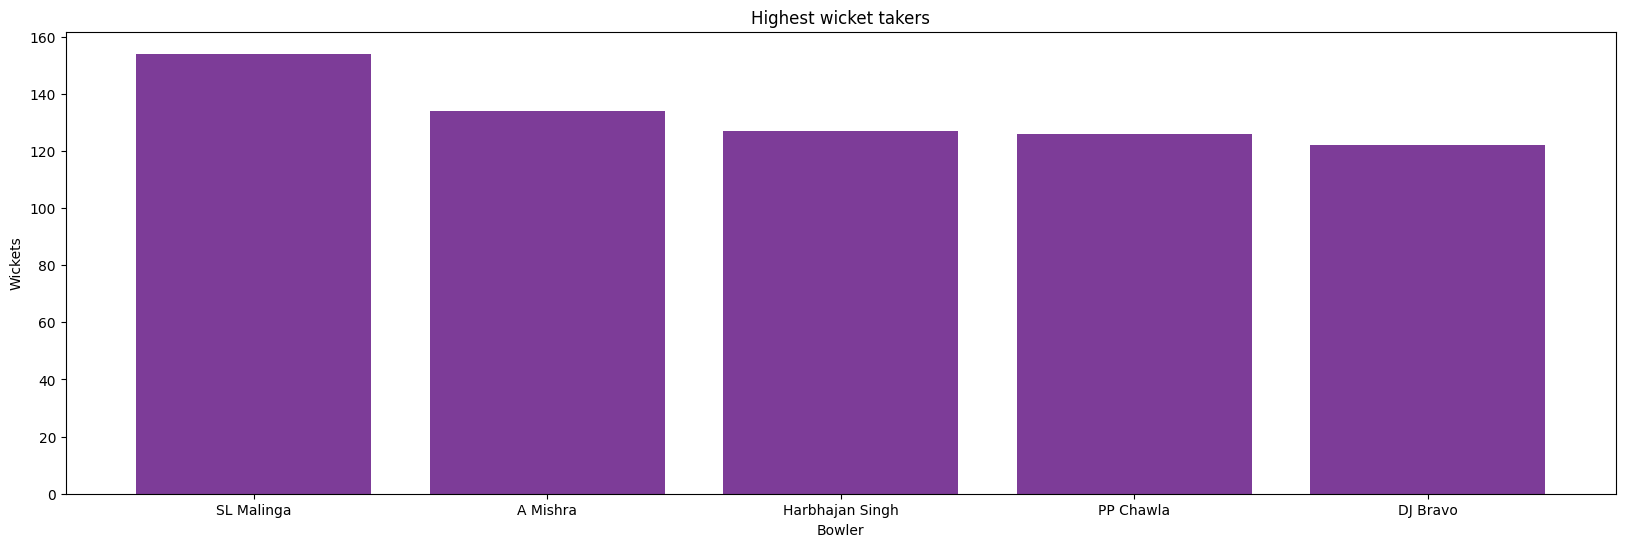

In [45]:
plt.gcf().set_size_inches(20,6)
plt.xlabel('Bowler')
plt.ylabel('Wickets')
plt.title('Highest wicket takers')
plt.bar(bowler, wickets, color = '#7D3C98')
plt.show()

#### Shows us the leading wicket takers and quality bowlers in the league.